# Pattern Recognition Assignment 1

The data consists of 42,000 examples where each example has 28x28=784 feature values. The first column contains the class label. To read in the data into Python, type (assuming you have saved the data in "D:/mnist.csv"):


In [ ]:
import pandas as pd
mnist_data = pd.read_csv('mnist.csv').values

To display an image of a digit, you can use the function "imshow" from the "matlibplot" library. For example, to display an image of the example in the first row of the mnist data set, type:

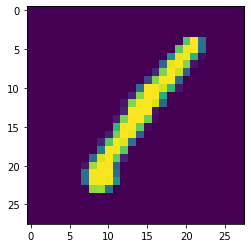

In [ ]:
import matplotlib.pyplot as plt
labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28
plt.imshow(digits[0].reshape(img_size, img_size))
plt.show()

## Exercise 1

Begin with an exploratory analysis of the data. Can you spot useless variables by looking at their summary statisitcs? Consider the class distribution: what percentage of cases would be classified correctly if we simply predict the majority class? Report any findings from your exploratory analysis that you think are of interest.

### Class distribution

In [ ]:
import numpy as np

Text(0.5, 1.0, 'Occurences per label')

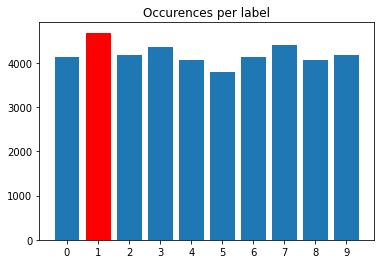

In [ ]:
x_label = ['0','1','2','3','4','5','6','7','8','9']
y_label_occurences = []

for i in range(10):
  y_label_occurences.append(np.count_nonzero(labels == i))

barplot1 = plt.bar(x_label,y_label_occurences, align = 'center')
barplot1[1].set_color('r')
plt.title('Occurences per label')

The percentage of correct predictions if we always predict the majority class (class 1)

In [ ]:
Correct_Pred_Percentage = (y_label_occurences[1] / sum(y_label_occurences)) * 100

print(round(Correct_Pred_Percentage), '%')

11 %


### Useless variables

In [ ]:
df = pd.read_csv("mnist.csv")

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Investigate which pixels are never used in ALL data. 
In other words, where pixel 'x' is always 0.

In [ ]:
non_used_labels = []



In [ ]:
for column in df:
    if ((df[column] == 0).all()):
      non_used_labels.append(100)
      print(column)
    else:
      non_used_labels.append(0)

pixel0
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel82
pixel83
pixel84
pixel85
pixel111
pixel112
pixel139
pixel140
pixel141
pixel168
pixel196
pixel392
pixel420
pixel421
pixel448
pixel476
pixel532
pixel560
pixel644
pixel645
pixel671
pixel672
pixel673
pixel699
pixel700
pixel701
pixel727
pixel728
pixel729
pixel730
pixel731
pixel754
pixel755
pixel756
pixel757
pixel758
pixel759
pixel760
pixel780
pixel781
pixel782
pixel783


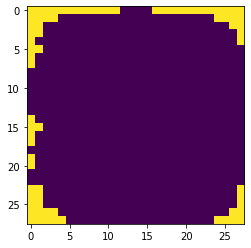

In [ ]:
non_used_labels_array = np.array(non_used_labels)

plt.imshow(non_used_labels_array[1:785].reshape(img_size, img_size))
plt.show()

In [ ]:
type(digits[0])

numpy.ndarray

# Exercise 2

Derive from the raw pixel data a feature that quantifies "how much ink" a digit costs. Report the average and standard deviation of this feature within each class. If you look at these statistics, can you see which pairs of classes can be distinguished well, and which pairs will be hard to distinguish using this feature?

###Ink Feature

In [ ]:
# create ink feature
import numpy as np
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [ ]:
for i in range(10):
  print('Class', i, ':', 'mean:',ink_mean[i], 'std:',ink_std[i])

Class 0 : mean: 34632.40755082285 std: 8461.892043158483
Class 1 : mean: 15188.466268146884 std: 4409.461697281539
Class 2 : mean: 29871.099353603066 std: 7653.006198983366
Class 3 : mean: 28320.188002757986 std: 7574.104535679545
Class 4 : mean: 24232.72249508841 std: 6374.633457092554
Class 5 : mean: 25835.920421607378 std: 7526.602988920305
Class 6 : mean: 27734.917331399563 std: 7530.503187255003
Class 7 : mean: 22931.244262667577 std: 6168.3408781754315
Class 8 : mean: 30184.148412503077 std: 7777.396357381105
Class 9 : mean: 24553.75 std: 6465.231330430596


Using only the ink feature, fit a multinomial logit model and evaluate, by looking at the confusion matrix, how well this model can distinguish between the different classes. Since in this part of the assignment we only consider very simple models, you may use the complete data set both for training and evaluation. For example, how well can the model distinguish between the digits "1" and "8"? And how well between "3" and "8"? Scale your feature to have zero mean and unit standard deviation before you fit the multinomial logit model. You can use the function "scale" from "sklearn.preprocessing" for this purpose.

In [ ]:
# The reshape is neccesary to call LogisticRegression() with a single feature
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1)

### Build model and train with ink feature

In [ ]:
# define the multinomial logistic regression model
from sklearn.linear_model import LogisticRegression
model_ink = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
model_ink.fit(ink, labels)

LogisticRegression(multi_class='multinomial')

### Evaluation and Confusion matrix

In [ ]:
y_pred_ink = model_ink.predict(ink)

In [ ]:
from sklearn import metrics
cnf_matrix_ink = metrics.confusion_matrix(labels, y_pred_ink)

In [ ]:
cnf_matrix_ink

array([[2420,   83,  322,  805,    0,    0,    0,  384,    0,  118],
       [  10, 3823,    5,  101,    0,    0,    0,  722,    0,   23],
       [1496,  280,  326, 1039,    0,    0,    0,  874,    0,  162],
       [1247,  408,  334, 1037,    0,    0,    0, 1141,    0,  184],
       [ 440,  831,  196,  886,    0,    0,    0, 1494,    0,  225],
       [ 728,  672,  197,  846,    0,    0,    0, 1189,    0,  163],
       [1057,  451,  296,  982,    0,    0,    0, 1144,    0,  207],
       [ 325, 1194,  149,  819,    0,    0,    0, 1696,    0,  218],
       [1430,  192,  343, 1047,    0,    0,    0,  879,    0,  172],
       [ 484,  764,  197,  869,    0,    0,    0, 1650,    0,  224]])

# Exercise 3

###New feature: Horizontal Symmetry




Calculate the total ink of pixel 0 till 391 and divide it by the total ink, pixel 0 till 783. 

In [ ]:
symmetry_hor = np.array([sum(row[0:392])/sum(row) for row in digits])
print(symmetry_hor[0:6])

# compute mean for each digit class
symmetry_mean_hor = [np.mean(symmetry_hor[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
symmetry_std_hor = [np.std(symmetry_hor[labels == i]) for i in range(10)]

[0.50219232 0.49088749 0.43247672 0.39900166 0.50359149 0.48965786]


In [ ]:
for i in range(10):
  print('Class', i, ':', 'mean:',symmetry_mean_hor[i], 'std:',symmetry_std_hor[i])

Class 0 : mean: 0.47950060172706455 std: 0.02278958843516853
Class 1 : mean: 0.4740526720876505 std: 0.02067823055940901
Class 2 : mean: 0.4090044242284317 std: 0.04667200220726184
Class 3 : mean: 0.49052585297444484 std: 0.0372549734026227
Class 4 : mean: 0.4391809742621961 std: 0.048670703268380335
Class 5 : mean: 0.49188075199795495 std: 0.04442290593450813
Class 6 : mean: 0.39649640050401513 std: 0.04238120919773648
Class 7 : mean: 0.5444465902344353 std: 0.047789445545251545
Class 8 : mean: 0.49067804545541677 std: 0.028148341308891076
Class 9 : mean: 0.49701132048059565 std: 0.045670089562151454


In [ ]:

symmetry_hor = scale(symmetry_hor).reshape(-1, 1)
print(symmetry_hor[0:6])

[[ 0.52683763]
 [ 0.33157625]
 [-0.6773166 ]
 [-1.25551047]
 [ 0.55100456]
 [ 0.3103377 ]]


In [ ]:
print(symmetry_hor.shape)

(42000, 1)


###Build model

In [ ]:
# define the multinomial logistic regression model
model_symmetry_hor = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
# train the model
model_symmetry_hor.fit(symmetry_hor, labels)

LogisticRegression(multi_class='multinomial')

### Evaluation and Confusion matrix

In [ ]:
y_pred_symmetry_hor = model_symmetry_hor.predict(symmetry_hor)
cnf_matrix_symmetry_hor = metrics.confusion_matrix(labels, y_pred_symmetry_hor)

In [ ]:
cnf_matrix_symmetry_hor

array([[   0, 2290,   35,  777,  383,    0,    5,  191,    0,  451],
       [   0, 2882,   39,  865,  579,    0,    6,   67,    0,  246],
       [   0,  614,  766,  101,  720,    0, 1885,   37,    0,   54],
       [   0, 1406,  153,  639,  448,    0,   41, 1026,    0,  638],
       [   0,  864,  856,  155,  892,    0,  898,  286,    0,  121],
       [   0, 1022,  195,  475,  413,    0,   99, 1101,    0,  490],
       [   0,  417,  751,   41,  568,    0, 2339,    5,    0,   16],
       [   0,  280,   84,  144,  122,    0,   42, 3417,    0,  312],
       [   0, 1506,   53,  846,  256,    0,   16,  666,    0,  720],
       [   0, 1432,  120,  495,  467,    0,   16, 1210,    0,  448]])

###New feature: Vertical Symmetry

In [ ]:
symmetry_vert = []

for row in digits:
  sum_per_instance = 0
  for i in range(28):
    sum_per_instance += (sum(row[i*28:i*28+13]))
  symmetry_vert.append(sum_per_instance/sum(row))

In [ ]:
symmetry_vert = np.array(symmetry_vert)
print(symmetry_vert.shape)

(42000,)


In [ ]:
# compute mean for each digit class
symmetry_vert__mean = [np.mean(symmetry_vert[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
symmetry_vert__std = [np.std(symmetry_vert[labels == i]) for i in range(10)]

In [ ]:
for i in range(10):
  print('Class', i, ':', 'mean:',symmetry_vert__mean[i], 'std:',symmetry_vert__std[i])

Class 0 : mean: 0.42655552387032253 std: 0.030982864799261725
Class 1 : mean: 0.20998888064394558 std: 0.13183692304460393
Class 2 : mean: 0.37359735705806796 std: 0.04051106782485404
Class 3 : mean: 0.33824194932114043 std: 0.04449788271225449
Class 4 : mean: 0.3781559077699028 std: 0.05338737867962625
Class 5 : mean: 0.39090472537191384 std: 0.04555011233998501
Class 6 : mean: 0.39066228746662696 std: 0.051346092222816185
Class 7 : mean: 0.3285830496549184 std: 0.060907781740545425
Class 8 : mean: 0.37307740026231584 std: 0.05214090226178142
Class 9 : mean: 0.3382603613689483 std: 0.04851249224118977


In [ ]:
symmetry_vert = scale(symmetry_vert).reshape(-1, 1)

###Build model

In [ ]:
# define the multinomial logistic regression model
model_symmetry_vert = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# train the model
model_symmetry_vert.fit(symmetry_vert, labels)

LogisticRegression(multi_class='multinomial')

### Evaluation

In [ ]:
y_pred_symmetry_vert = model_symmetry.predict(symmetry_vert)
cnf_matrix_symmetry_vert = metrics.confusion_matrix(labels, y_pred_symmetry_vert)

In [ ]:
cnf_matrix_symmetry_vert

array([[   0,  230,    0,  437,    9,    0,    1, 2409,    0, 1046],
       [   0,  692,  354,  262,  432,    0, 2661,   87,    0,  196],
       [   0, 1721,   68,  931,  314,    0,   20,  411,    0,  712],
       [   0, 2108,  346,  491,  946,    0,  144,   89,    0,  227],
       [   0, 1441,  130,  579,  402,    0,   44,  874,    0,  602],
       [   0, 1055,   45,  706,  181,    0,   27,  881,    0,  900],
       [   0, 1176,   84,  638,  271,    0,   29, 1178,    0,  761],
       [   0, 1313,  683,  490,  870,    0,  436,  213,    0,  396],
       [   0, 1380,  168,  674,  411,    0,   63,  663,    0,  704],
       [   0, 1784,  384,  443,  972,    0,  150,  160,    0,  295]])

# Exercise 4

Fit a multinomial logit model using both features, and report if and how it improves on the single-feature models.

In [ ]:
print(ink.shape)
print(symmetry_hor.shape)
print(symmetry_vert.shape)

(42000, 1)
(42000, 1)
(42000, 1)


In [ ]:
two_feature_ink_symH = np.column_stack((ink, symmetry_hor))
print(two_feature_ink_symH.shape)
two_feature_ink_symV = np.column_stack((ink, symmetry_vert))
print(two_feature_ink_symV.shape)
two_feature_symH_symV = np.column_stack((symmetry_hor, symmetry_vert))
print(two_feature_symH_symV.shape)

three_features = np.column_stack((ink, symmetry_hor, symmetry_vert))
print(three_features.shape)

(42000, 2)
(42000, 2)
(42000, 2)
(42000, 3)


###Build models

In [ ]:
#Model 1
model_2features_ink_symH = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# train the model
model_2features_ink_symH.fit(two_feature_ink_symH, labels)

#Model 2
model_2features_ink_symV = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# train the model
model_2features_ink_symV.fit(two_feature_ink_symV, labels)

#Model 3
model_2features_symH_symV = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# train the model
model_2features_symH_symV.fit(two_feature_symH_symV, labels)

#Model 4
model_3features = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# train the model
model_3features.fit(three_features, labels)

LogisticRegression(multi_class='multinomial')

### Evaluation and Confusion matrix

In [ ]:
y_pred__ink_symH = model_2features_ink_symH.predict(two_feature_ink_symH)
cnf_matrix__ink_symH = metrics.confusion_matrix(labels, y_pred__ink_symH)

y_pred_ink_symV = model_2features_ink_symV.predict(two_feature_ink_symV)
cnf_matrix_ink_symV = metrics.confusion_matrix(labels, y_pred_2features_ink_symV)

y_pred_symH_symV = model_2features_symH_symV.predict(two_feature_symH_symV)
cnf_matrix_symH_symV = metrics.confusion_matrix(labels, y_pred_2features_symH_symV)

y_pred_3features = model_3features.predict(three_features)
cnf_matrix_3features = metrics.confusion_matrix(labels, y_pred_3features)

In [ ]:
def correct_labels_percentage(mat):
  n = len(mat)
  j = 0
  correct = 0
  for i in range(len(mat)):
    #print(cnf_matrix_2features[i][j])
    correct += mat[i][j]
    j += 1
  result = (correct/np.sum(mat))*100
  return (result)

In [ ]:
cnf_matrix__ink_symH

array([[2379,   93,  128,  737,  244,    0,    7,   48,  199,  297],
       [  13, 3929,   10,   64,  285,    0,    3,   50,    1,  329],
       [ 402,  132, 1323,  177,  599,    0, 1390,   22,   24,  108],
       [ 977,  345,  214,  698,  446,    0,   40,  700,  315,  616],
       [ 193,  537,  575,  247, 1228,    0,  782,  256,   27,  227],
       [ 482,  539,  164,  485,  452,    0,   94,  851,  209,  519],
       [ 258,  164, 1020,   90,  591,    0, 1939,    2,   11,   62],
       [  94,  403,   42,  138,  162,    0,   48, 3166,  123,  225],
       [1176,  218,  113,  884,  302,    0,    9,  286,  408,  667],
       [ 393,  552,  129,  550,  641,    0,   19, 1071,  124,  709]])

In [ ]:
print("Accuracy is: ",metrics.accuracy_score(labels, y_pred__ink_symH)*100, "%")

Accuracy is:  37.569047619047616 %


In [ ]:
cnf_matrix_ink_symV

array([[2910,    4,  196,   57,  193,  211,  393,   22,  131,   15],
       [   6, 3538,   11,  127,  562,   31,   24,  372,    0,   13],
       [ 747,  117,  555,  825,  541,   94,  443,  423,  340,   92],
       [ 218,  332,  372, 1690,  317,   33,  150,  865,  259,  115],
       [ 603,  364,  250,  383,  925,  289,  398,  695,   59,  106],
       [ 742,  198,  289,  286,  924,  351,  477,  365,  109,   54],
       [1175,  196,  310,  428,  663,  270,  433,  450,  138,   74],
       [ 162,  927,  174,  828,  715,  100,  254, 1123,   45,   73],
       [ 973,  113,  423,  912,  392,  118,  390,  433,  221,   88],
       [ 190,  556,  243,  939,  559,   61,  203, 1228,   79,  130]])

In [ ]:
print("Accuracy is: ",metrics.accuracy_score(labels, y_pred_ink_symV)*100, "%")

Accuracy is:  28.27619047619048 %


In [ ]:
cnf_matrix_symH_symV

array([[3023,    3,    4,   59,  346,  369,   30,   22,  265,   11],
       [ 187, 3161,   18,  614,  303,   84,    7,   37,  224,   49],
       [ 203,  141, 1092,  215,  696,   58, 1590,   31,  127,   24],
       [ 117,  585,  176, 1079,  446,  201,   34,  903,  424,  386],
       [ 557,  223,  839,  305,  752,   77,  892,  228,  141,   58],
       [1000,  101,  140,  342,  428,  566,  157,  558,  378,  125],
       [ 492,   66, 1030,   48,  419,   17, 2024,    0,   39,    2],
       [ 136,  347,   75,  157,   82,  212,   30, 3148,  115,   99],
       [ 930,  285,   36,  734,  316,  549,   28,  349,  580,  256],
       [ 223,  426,  109,  962,  517,  171,   40, 1145,  323,  272]])

In [ ]:
print("Accuracy is: ",metrics.accuracy_score(labels, y_pred_symH_symV)*100, "%")

Accuracy is:  37.37380952380953 %


In [ ]:
cnf_matrix_3features

array([[2934,    8,   80,   56,  195,  456,   26,    8,  348,   21],
       [   9, 3721,   10,  159,  329,  254,    2,   42,    8,  150],
       [ 226,   92, 1600,  242,  523,   91, 1183,   22,  121,   77],
       [ 171,  333,  308, 1462,  264,  166,   31,  650,  502,  464],
       [ 305,  308,  582,  186, 1192,  222,  813,  216,   88,  160],
       [ 608,  189,  131,  234,  522,  917,  128,  481,  358,  227],
       [ 424,   98, 1060,   40,  547,   71, 1843,    0,   33,   21],
       [  84,  361,   74,  253,   85,  269,   28, 3003,  116,  128],
       [ 911,  152,  102,  885,  226,  520,   19,  174,  698,  376],
       [ 171,  450,  160,  781,  481,  281,   33, 1039,  226,  566]])

In [ ]:
print("Accuracy is: ",metrics.accuracy_score(labels, y_pred_3features)*100, "%")

Accuracy is:  42.70476190476191 %


###Compare with confusion matrix of ink and symmetry

In [ ]:
cnf_matrix_ink

In [ ]:
print('Correct score of ink feature model:',correct_labels_percentage(cnf_matrix_ink),'%')

In [ ]:
cnf_matrix_symmetry

In [ ]:
print('Correct score of symmetry feature model:',correct_labels_percentage(cnf_matrix_symmetry),'%')

#Exercise 5

In this part we use the 784 raw pixel values themselves as features.
Draw a random sample of size 5,000 from the data, and use these 5,000 examples for training and model selection (using cross-validation). Estimate the error of the models finally selected on the remaining 37,000 examples.


###Spli the data in 5000 traning data and 37000 test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size=37000, random_state=4)

##Regularized multinomial logit model (using the LASSO penalty)

###Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
gridLR = GridSearchCV(cv=5,
             estimator=linear_model.Lasso(),
             param_grid={'alpha': [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]})
gridLR.fit(x_train, y_train)
print("Initial score:" , gridLR.best_score_)
gridLR.best_params_



In [ ]:
best_param_lr = gridLR.best_params_['alpha']

###Logistic Regression Model with Lasso

In [ ]:
from sklearn.linear_model import Lasso

clf_lr_with_lasso = Lasso(alpha= best_param_lr)
clf_lr_with_lasso.fit(x_train, y_train)

In [ ]:
y_hat = clf_lr_with_lasso.predict(x_test)
y_hat_round = np.abs(np.round(y_hat))
for y in range(len(y_hat_round)):
  if y_hat_round[y] > 9:
    y_hat_round[y] = 9
  if y_hat_round[y] < 0:
    y_hat_round[y] = 0

###Evaluation

In [ ]:
cnf_matrix_lr_with_lasso = metrics.confusion_matrix(y_test, y_hat_round)

In [ ]:
cnf_matrix_lr_with_lasso

In [ ]:
print("Accuracy is: ",metrics.accuracy_score(y_test, y_hat_round)*100, "%")

#SVM Model

###Cross validation

In [ ]:
from sklearn.svm import LinearSVC

gridLR_SVM = GridSearchCV(cv=5,
             estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})
gridLR_SVM.fit(x_train, y_train)
print("Initial score:" , gridLR_SVM.best_score_)
gridLR_SVM.best_params_

best_param_svm = gridLR_SVM.best_params_['C']

###Model SVM

In [ ]:
clf_svm = LinearSVC(C = best_param_svm)
clf_svm.fit(x_train, y_train)

###Evaluation

In [ ]:
y_pred_svm = clf_svm.predict(x_test)

In [ ]:
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm


In [ ]:
print("Accuracy is: ",metrics.accuracy_score(y_test, y_pred_svm)*100, "%")

#MLP Classifier

###Cross validation

In [ ]:
from sklearn.neural_network import MLPClassifier
parameter_space = {
    'hidden_layer_sizes': [(500,), (600,),(700,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.01, 0.025, 0.05],
    'learning_rate': ['constant'],
}
griddeepnetwork = GridSearchCV(estimator=MLPClassifier(),param_grid=parameter_space,cv=5)
griddeepnetwork.fit(x_train, y_train)
print("Initial score:" , griddeepnetwork.best_score_)
griddeepnetwork.best_params_

Best parameters:

Initial score: 0.9224
{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (500,),
 'learning_rate': 'constant',
 'solver': 'adam'}

###Neural Network Model

In [ ]:
clf_mlp = MLPClassifier(activation= 'relu',
 alpha= 0.05,
 hidden_layer_sizes = (500,),
 learning_rate = 'constant',
 solver = 'adam')
clf_mlp.fit(x_train, y_train)

###Evaluation

In [ ]:
y_pred_mlp = clf_mlp.predict(x_test)

In [ ]:
cnf_matrix_mlp = metrics.confusion_matrix(y_test, y_pred_mlp)
cnf_matrix_mlp

In [ ]:
print("Accuracy is: ",metrics.accuracy_score(y_test, y_pred_mlp)*100, "%")